In [61]:
import numpy as np
from numpy import cos,sin,matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

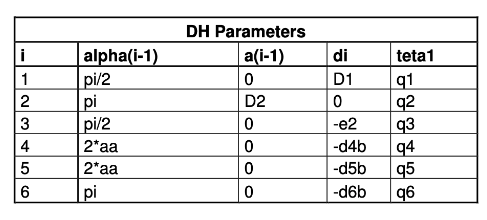
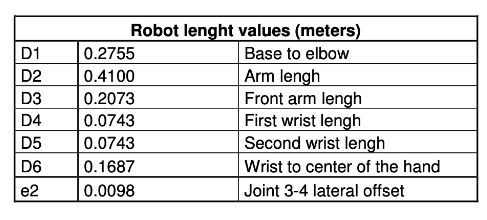
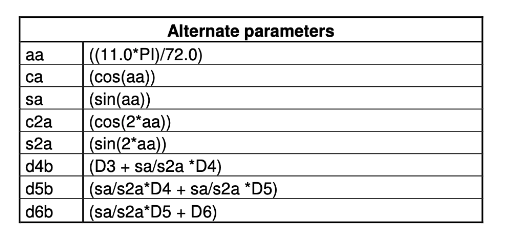


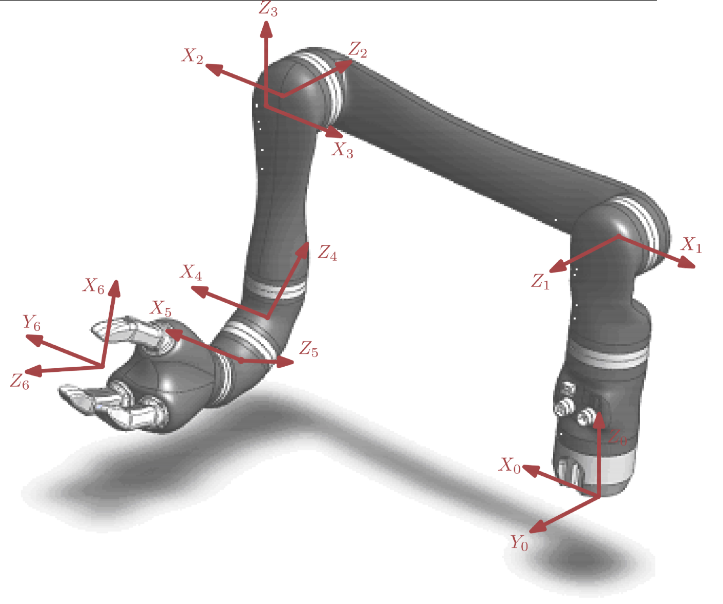

In [62]:
def dh_transform(alpha, a, d, theta):
    """
    Calculate the transformation matrix for a single DH parameter set.
    :param alpha: Link twist angle (in radians)
    :param a: Link length (in units)
    :param d: Link offset (in units)
    :param theta: Joint angle (in radians)
    :return: 4x4 transformation matrix
    """
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)

    # Construct the transformation matrix
    matrix = np.array([[cos_theta, -sin_theta*cos_alpha,  sin_theta*sin_alpha, a*cos_theta],
                       [sin_theta,  cos_theta*cos_alpha, -cos_theta*sin_alpha, a*sin_theta],
                       [        0,            sin_alpha,            cos_alpha,           d],
                       [        0,                    0,                    0,           1]])
    return matrix

def dh_to_transformation_matrices(dh_parameters):
    """
    Convert DH parameters of a robot arm to the transformation matrices for each frame.
    :param dh_parameters: List of DH parameter tuples (alpha, a, d, theta)
    :return: List of 4x4 transformation matrices for each frame
    """
    num_joints = len(dh_parameters)
    transformation_matrices = []

    # alpha, a, d, theta = dh_parameters[0]
    # T01 = dh_transform(alpha, a, d, theta)
    # alpha, a, d, theta = dh_parameters[1]
    # T12 = dh_transform(alpha, a, d, theta)
    # alpha, a, d, theta = dh_parameters[2]
    # T23 = dh_transform(alpha, a, d, theta)
    # alpha, a, d, theta = dh_parameters[3]
    # T34 = dh_transform( alpha, a, d, theta)
    # alpha, a, d, theta = dh_parameters[4]
    # T45 = dh_transform( alpha, a, d, theta)
    # alpha, a, d, theta = dh_parameters[5]
    # T56 = dh_transform( alpha, a, d, theta)

    # T01 = T01
    # T02 = T01@T12
    # T03 = T01@T12@T23
    # T04 = T01@T12@T23@T34
    # T05 = T01@T12@T23@T34@T45
    # T06 = T01@T12@T23@T34@T45@T56
    # transformation_matrices = [T01,T02,T03,T04,T05,T06]

    previous_matrix = np.identity(4)

    for i in range(num_joints):
        alpha, a, d, theta = dh_parameters[i]
        matrix = dh_transform(alpha, a, d, theta)
        transformation_matrix = np.matmul(previous_matrix, matrix)
        transformation_matrices.append(transformation_matrix)
        previous_matrix = transformation_matrix

    return transformation_matrices

# def dh_to_transformation_matrix(dh_parameters):
#     """
#     Convert DH parameters of a robot arm to the transformation matrix.
#     :param dh_parameters: List of DH parameter tuples (alpha, a, d, theta)
#     :return: 4x4 transformation matrix
#     """
#     num_joints = len(dh_parameters)
#     transformation_matrix = np.identity(4)

#     for i in range(num_joints):
#         alpha, a, d, theta = dh_parameters[i]
#         matrix = dh_transform(alpha, a, d, theta)
#         transformation_matrix = np.dot(transformation_matrix, matrix)

    return transformation_matrix

def plot_robot_arm(transformation_matrices):
    """
    Plot the robot arm using the transformation matrices.
    :param transformation_matrices: List of 4x4 transformation matrices for each frame
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Base coordinates
    base_coords = np.array([0, 0, 0, 1])

    # Plot each link and joint of the robot arm
    for matrix in transformation_matrices:
        link_coords = np.matmul(matrix, base_coords)
        x = [base_coords[0], link_coords[0]]
        y = [base_coords[1], link_coords[1]]
        z = [base_coords[2], link_coords[2]]
        ax.plot(x, y, z, 'b')

        # Plot joint marker
        ax.plot([link_coords[0]], [link_coords[1]], [link_coords[2]], 'ro')

        base_coords = link_coords

    # # Add a circular plane at the origin
    # theta = np.linspace(0, 2*np.pi, 100)
    # r = 0.1  # Radius of the circular plane
    # x_circle = r * np.cos(theta)
    # y_circle = r * np.sin(theta)
    # z_circle = np.zeros_like(theta)
    # ax.plot(x_circle, y_circle, z_circle, 'g')
    ax.plot(0, 0, 0, 'go')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Robot Arm')
    plt.show()



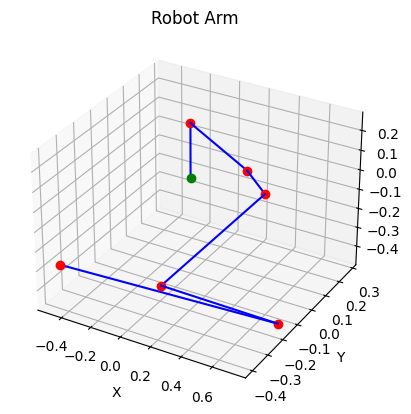

In [63]:
## DH variable [Solution 1]
D1 = 0.2755
D2 = 0.41
e2 = 0.0098
D3 = 0.2073
D4 = 0.0741
D5 = 0.0741
D6 = 0.16

aa = np.pi/6
ca = cos(aa)
sa = sin(aa)
c2a = cos(2*aa)
s2a = sin(2*aa)
d4b = (D3+(D5*(sa/s2a)))
d5b = (D4*(sa/s2a)) + (D5*(sa/s2a))
d6b = (D5*(sa/s2a)) + (D6)

# 0 15 180 -130 0 55 90
q1_robot = 0
q2_robot = 15
q3_robot = 180
q4_robot = -130
q5_robot = 0
q6_robot = 55

q1 = -q1_robot
q2 =  q2_robot - 90
q3 =  q3_robot + 90
q4 =  q4_robot
q5 =  q5_robot - 180
q6 =  q6_robot + 90

q1 = np.deg2rad(q1)
q2 = np.deg2rad(q2)
q3 = np.deg2rad(q3)
q4 = np.deg2rad(q4)
q5 = np.deg2rad(q5)
q6 = np.deg2rad(q6)

# Example DH parameters for a 7-DOF JACO arm
# (alpha, a, d, theta)
dh_parameters = [
    ( np.pi/2,      0,          D1,          q1),    # frame{0} to frame{1}
    (   np.pi,     D2,           0,          q2),    # frame{1} to frame{2}
    ( np.pi/2,      0,         -e2,          q3),    # frame{2} to frame{3}
    (    2*aa,      0,        -d4b,          q4),    # frame{3} to frame{4}  
    (    2*aa,      0,        -d5b,          q5),    # frame{4} to frame{5}
    (   np.pi,      0,        -d6b,          q6)    # frame{5} to frame{6}
    # (       0,      0,      0.1214,          0)     # frame{6} to frame{7}
]

# Convert DH parameters to transformation matrix
transformation_matrix = dh_to_transformation_matrices(dh_parameters)

# Print the resulting transformation matrix
# print(transformation_matrix)
plot_robot_arm(transformation_matrix)